## Case study on Pre-processing

#### Objective:
    
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

#### Dataset used : 'titanic_dataset.csv'

#### 1.Loading the dataset into python environment

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [133]:
df = pd.read_csv('titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 2.Making ‘PassengerId’ as the index column

In [134]:
df=pd.read_csv('titanic_dataset.csv', index_col='PassengerId')              #index name got reset to "PassengerId"
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3.Checking the basic details of the dataset

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [136]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [137]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [138]:
df.shape

(891, 11)

Insights:
    
    -> There are 2 float, 4 integer, 5 object columns in the dataset
    -> Three columns(Age, Cabin and Embarked) consists of null values.
    -> 891 rows and 11 columns are there.
    -> Average age of the people who was in the Ship was approximately 30

#### 4.Filling in all the missing values present in all the columns in the dataset

In [139]:
df.drop(['Cabin','Name','Ticket'],axis = 1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [140]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [141]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### 5.Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Box plot of Age')

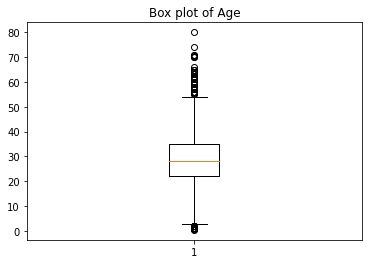

In [142]:
#Age Column

plt.boxplot(df['Age'])
plt.title('Box plot of Age')

In [143]:
Q1 = np.percentile(df['Age'], 25, interpolation='midpoint')
print(Q1)
Q2 = np.percentile(df['Age'], 50, interpolation='midpoint')
print(Q2)
Q3 = np.percentile(df['Age'], 75, interpolation='midpoint')
print(Q3)

22.0
28.0
35.0


In [144]:
df['Age'].median()

28.0

In [145]:
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('Lower limit :',lower_limit)
print('Upper limit :',upper_limit)

Lower limit : 2.5
Upper limit : 54.5


In [146]:
outlier=[]
for x in df['Age']:
    if (x>upper_limit) or (x<lower_limit):
        outlier.append(x)
print(outlier)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [147]:
#Finding the indices of outliers

indL = df['Age'] > upper_limit
df.loc[indL].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [148]:
#Finding the indices of outliers

indU = df['Age'] < lower_limit
df.loc[indU].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [149]:
df.drop([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832], inplace=True)

Text(0.5, 1.0, 'Box plot of Age')

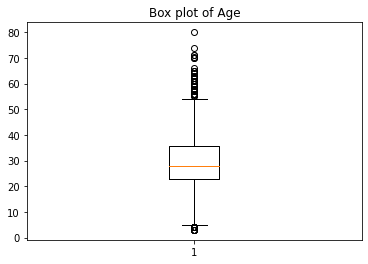

In [150]:
plt.boxplot(df['Age'])
plt.title('Box plot of Age')

In [151]:
# SibSp Column

Text(0.5, 1.0, 'Box plot of SibSp')

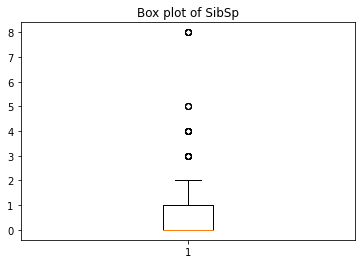

In [152]:
plt.boxplot(df['SibSp'])
plt.title('Box plot of SibSp')

In [153]:
Q1 = np.percentile(df['SibSp'], 25, interpolation='midpoint')
print(Q1)
Q2 = np.percentile(df['SibSp'], 50, interpolation='midpoint')
print(Q2)
Q3 = np.percentile(df['SibSp'], 75, interpolation='midpoint')
print(Q3)

0.0
0.0
1.0


In [154]:
df['SibSp'].median()

0.0

In [155]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
upp_lim = Q3+1.5*IQR
print('The lower limit is : ', low_lim)
print('The upper limit is : ', upp_lim)

The lower limit is :  -1.5
The upper limit is :  2.5


In [156]:
outlier = []
for x in df['SibSp']:
    if ((x >  upp_lim) or (x < low_lim)):
        outlier.append(x)
outlier        

[3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 8,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 8,
 4,
 8]

In [157]:
index1 = df['SibSp'] > upp_lim
df.loc[index1].index

Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [158]:
df.drop([  25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864], inplace=True)

Text(0.5, 1.0, 'Box plot of SibSp')

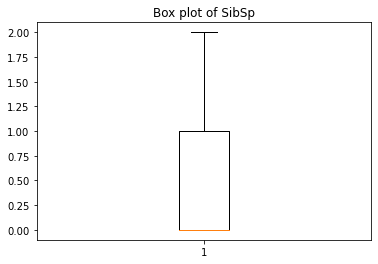

In [159]:
plt.boxplot(df['SibSp'])
plt.title('Box plot of SibSp')

In [160]:
# Fare column

Text(0.5, 1.0, 'Box plot of Fare')

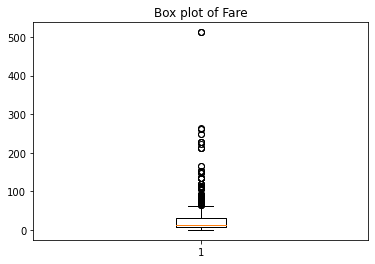

In [161]:
plt.boxplot(df['Fare'])
plt.title('Box plot of Fare')

In [162]:
Q1 = np.percentile(df['Fare'], 25, interpolation='midpoint')
print(Q1)
Q2 = np.percentile(df['Fare'], 50, interpolation='midpoint')
print(Q2)
Q3 = np.percentile(df['Fare'], 75, interpolation='midpoint')
print(Q3)

7.8958
13.0
30.0


In [163]:
df['Fare'].median()

13.0

In [164]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
upp_lim = Q3+1.5*IQR
print('The lower limit is : ', low_lim)
print('The upper limit is : ', upp_lim)

The lower limit is :  -25.2605
The upper limit is :  63.1563


In [165]:
outlier = []
for x in df['Fare']:
    if ((x >  upp_lim) or (x < low_lim)):
        outlier.append(x)
outlier

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 146.5208,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 80.0,
 83.1583,
 89.1042,
 164.8667,
 83.1583]

In [166]:
index1 = df['Fare'] > upp_lim
df.loc[index1].index

Int64Index([  2,  32,  35,  53,  62,  63,  73,  98, 103, 119,
            ...
            766, 780, 790, 803, 821, 830, 836, 850, 857, 880],
           dtype='int64', name='PassengerId', length=107)

In [167]:
index = df[(df['Fare'] > upp_lim)|(df['Fare'] < low_lim)].index
df.drop(index, inplace=True)

Text(0.5, 1.0, 'Box plot of Fare')

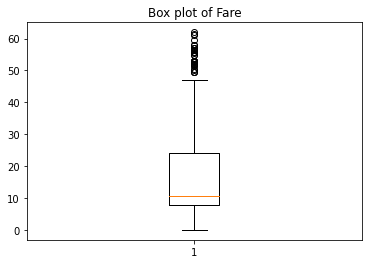

In [168]:
plt.boxplot(df['Fare'])
plt.title('Box plot of Fare')

#### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [169]:
label = preprocessing.LabelEncoder() 
df['Sex']= label.fit_transform(df['Sex']) 
print(df['Sex'].unique())

[1 0]


In [170]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S
3,1,3,0,26.0,0,0,7.9250,S
4,1,1,0,35.0,1,0,53.1000,S
5,0,3,1,35.0,0,0,8.0500,S
6,0,3,1,28.0,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,S
888,1,1,0,19.0,0,0,30.0000,S
889,0,3,0,28.0,1,2,23.4500,S


In [171]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform([[7.75]])
x=pd.DataFrame(x)

In [172]:
df1=pd.get_dummies(df['Embarked'])
df=pd.concat([df, df1], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
PassengerId,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S,0,0,1
3,1,3,0,26.0,0,0,7.9250,S,0,0,1
4,1,1,0,35.0,1,0,53.1000,S,0,0,1
5,0,3,1,35.0,0,0,8.0500,S,0,0,1
6,0,3,1,28.0,0,0,8.4583,Q,0,1,0


In [173]:
df.drop('Embarked', axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,0,1
3,1,3,0,26.0,0,0,7.9250,0,0,1
4,1,1,0,35.0,1,0,53.1000,0,0,1
5,0,3,1,35.0,0,0,8.0500,0,0,1
6,0,3,1,28.0,0,0,8.4583,0,1,0


In [174]:
y=df["Survived"]
x=df.drop(["Survived"],axis=1)

In [175]:
x.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,2.457698,0.696255,30.203883,0.262136,0.260749,16.906841,0.152566,0.098474,0.748960
std,0.746250,0.460193,11.693097,0.493649,0.740663,13.169832,0.359818,0.298162,0.433913
min,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,24.000000,0.000000,0.000000,7.879200,0.000000,0.000000,0.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,10.516700,0.000000,0.000000,1.000000
75%,3.000000,1.000000,35.000000,0.000000,0.000000,24.150000,0.000000,0.000000,1.000000
max,3.000000,1.000000,80.000000,2.000000,6.000000,61.979200,1.000000,1.000000,1.000000


In [176]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)
x=pd.DataFrame(x)

In [177]:
x.describe()

,0,1,2,3,4,5,6,7,8
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,0.728849,0.696255,0.353297,0.131068,0.043458,0.272783,0.152566,0.098474,0.748960
std,0.373125,0.460193,0.151858,0.246824,0.123444,0.212488,0.359818,0.298162,0.433913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.272727,0.000000,0.000000,0.127127,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.324675,0.000000,0.000000,0.169681,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.415584,0.000000,0.000000,0.389647,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [178]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
predictions=model.predict(x_test)
#To find the efficiency of our regression model by finding MSE
from sklearn.metrics import mean_squared_error
print('MSE is : ', mean_squared_error(y_test, predictions))
#To find the efficiency of our regression model by finding R^2 Value
from sklearn.metrics import r2_score
print('R squared value is : ', r2_score(y_test, predictions))

MSE is :  0.1370024582435345
R squared value is :  0.35989407009548613


Insights:

    ->Taking 'Survived' as target, performed min-max scaling
    ->MSE value is 0.14823693785396666.
    ->As the MSE value i too low we can infer that model is good